In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import math

In [2]:
dataset = pd.read_csv('hexagon.csv')

In [106]:
class kohonen:
    def __init__(self, M, N, dataset, width):
        self.M=M
        self.N=N
        self.dataset = dataset
        self.neurons = np.random.normal(np.min(x), np.max(x), size=(N*M,dataset.shape[1]))
        self.width = width
    
    def learn(self,lambda_, method="gauss"):
        
        if method == "mexican":
            neighbor_function = self.mexican_hat
        else:
            neighbor_function = self.gauss
        for iteration in range(lambda_):
            p = np.random.permutation(len(self.dataset))
            x = self.dataset[p]
            for inp in x:
                minimal_pos = np.argmin([np.linalg.norm(neuron-inp) for neuron in self.neurons])
                for i,neuron in enumerate(self.neurons):
                    self.neurons[i] = neuron + neighbor_function(self.dist(self,minimal_pos,i))*self.alpha_fun(iteration,lambda_)*(inp-neuron)
    
    def classify(self):
        return [np.argmin([np.linalg.norm(neuron-inp) for neuron in self.neurons]) for inp in self.dataset]
        
    @staticmethod
    def dist(self,x,y):
        k = max(self.N,self.M)
        return math.sqrt((self.width*(x-y)%k)**2 + (self.width*(math.floor(x/k)-math.floor(y/k)))**2)
    
    @staticmethod
    def alpha_fun(iteration,lambda_):
        return math.exp(-iteration/lambda_)
    
    @staticmethod
    def gauss(x):
        return math.exp(-x**2)
    
    @staticmethod
    def mexican_hat(x):
        return math.exp(-x**2) * (2-4*x**2)

In [107]:
dataset = pd.read_csv('hexagon.csv')
x = np.asarray(dataset.iloc[:,[0,1]])

In [ ]:
colors= [[240,163,255],[0,117,220],[153,63,0],[76,0,92],[25,25,25],[0,92,49],[43,206,72],[255,204,153],[128,128,128],[148,255,181],[143,124,0],[157,204,0],[194,0,136],[0,51,128],[255,164,5],[255,168,187],[66,102,0],[255,0,16],[94,241,242],[0,153,143],[224,255,102],[116,10,255],[153,0,0],[255,255,128],[255,255,0],[255,80,5]]
colors = [np.array(list(color))/256 for color in colors]
fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.scatter(dataset['x'], dataset['y'], c=c, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.4)
plt.scatter(koh.neurons[:,0],koh.neurons[:,1], color = "black")

plt.subplot(1, 2, 2)
plt.scatter(dataset['x'], dataset['y'], c=dataset['c'], cmap=matplotlib.colors.ListedColormap(colors))

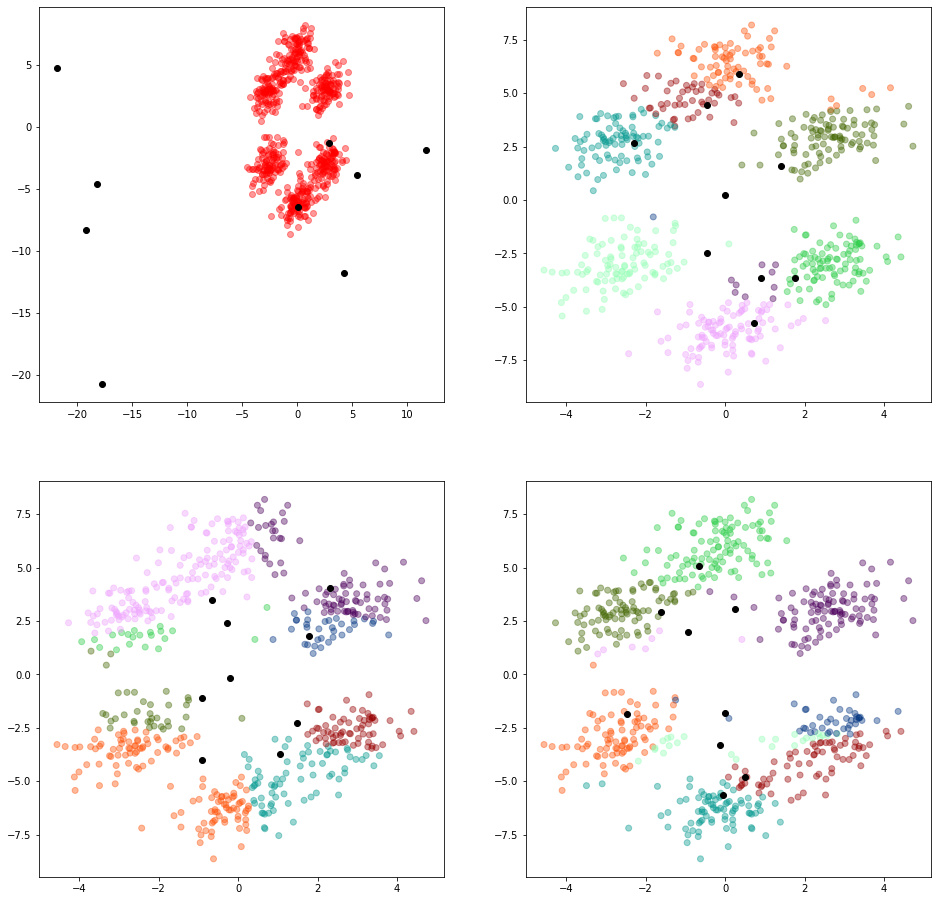

In [112]:
koh = kohonen(3,3,x,1)

fig = plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
plt.scatter(dataset['x'], dataset['y'], color = "red", alpha=0.4)
plt.scatter(koh.neurons[:,0],koh.neurons[:,1], color = "black")

koh.learn(lambda_=10, method="gauss")
c = koh.classify()

plt.subplot(2, 2, 2)
plt.scatter(dataset['x'], dataset['y'], c=c, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.9)
plt.scatter(koh.neurons[:,0],koh.neurons[:,1], color = "black")

koh.learn(lambda_=150, method="gauss")
c = koh.classify()

plt.subplot(2, 2, 3)
plt.scatter(dataset['x'], dataset['y'], c=c, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.9)
plt.scatter(koh.neurons[:,0],koh.neurons[:,1], color = "black")

koh.learn(lambda_=150, method="gauss")
c = koh.classify()

plt.subplot(2, 2, 4)
plt.scatter(dataset['x'], dataset['y'], c=c, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.9)
plt.scatter(koh.neurons[:,0],koh.neurons[:,1], color = "black")


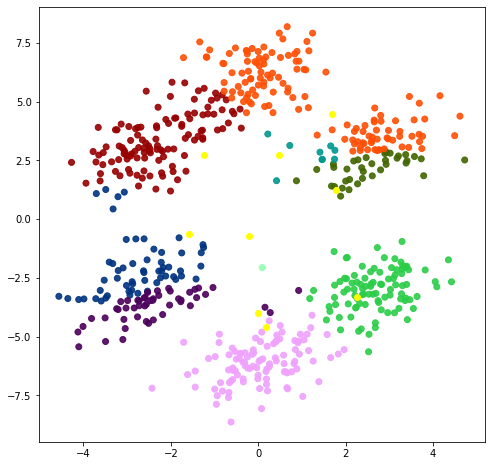

In [121]:
koh.learn(lambda_=250, method="gauss")
c = koh.classify()

fig = plt.figure(figsize=(8,8))

plt.scatter(dataset['x'], dataset['y'], c=c, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.9)
plt.scatter(koh.neurons[:,0],koh.neurons[:,1], color = "yellow")

### Cube 

In [28]:
dataset = pd.read_csv('cube.csv')
x = np.asarray(dataset.iloc[:,[0,1,2]])

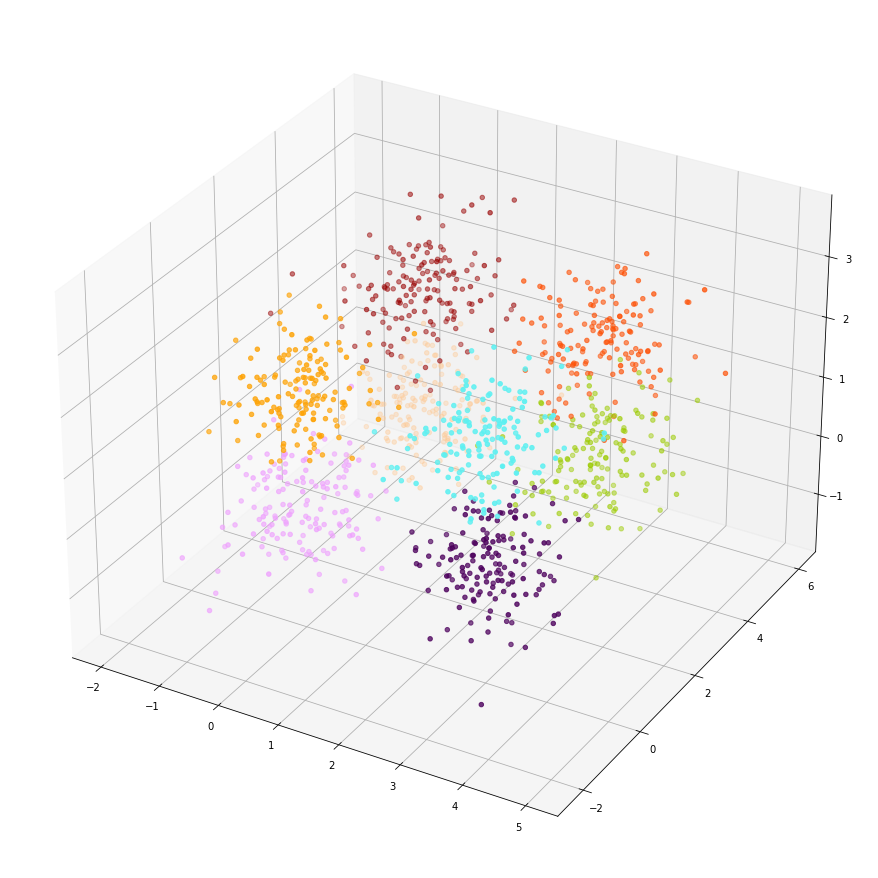

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=dataset['c'], cmap=matplotlib.colors.ListedColormap(colors))

In [31]:
koh = kohonen(5,5,x,1)
koh.neurons
koh.learn(lambda_=300, method="gauss")
c = koh.classify()

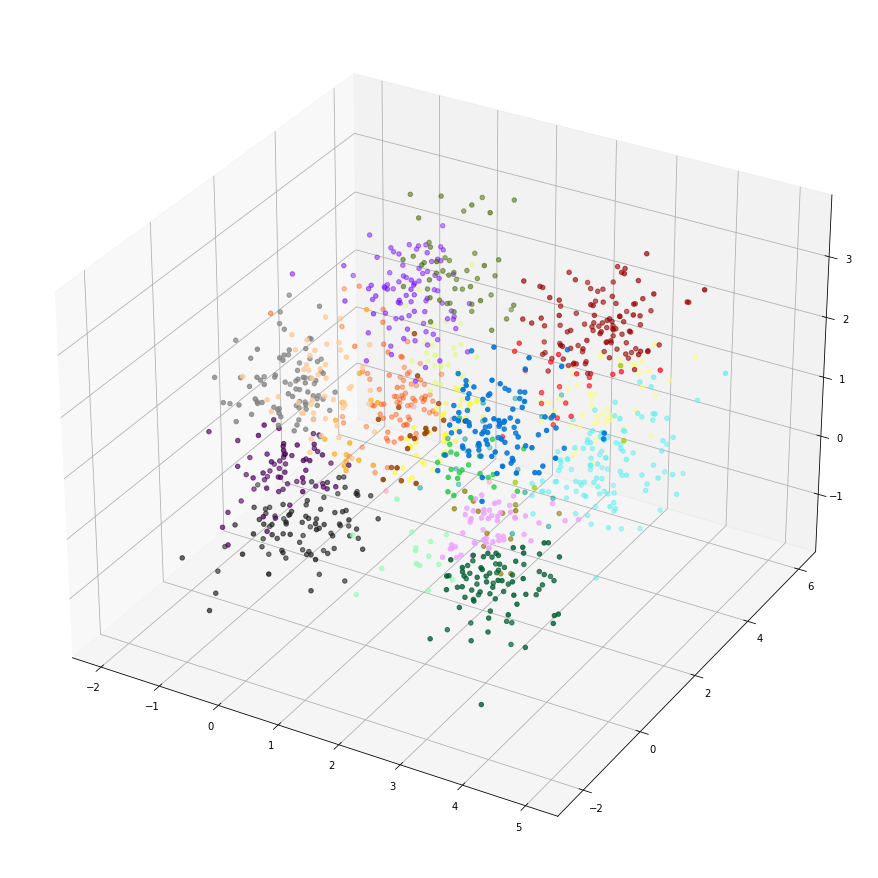

In [32]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=c, cmap=matplotlib.colors.ListedColormap(colors))

In [111]:
np.random.uniform(5,10, size=(3*5,2,3))

array([[[5.08806656, 8.36384395, 9.27770564],
        [6.68442499, 6.66824816, 9.94565298]],

       [[7.76169951, 6.39671049, 7.9959639 ],
        [7.90078547, 8.13133815, 6.29278636]],

       [[8.2458864 , 7.465801  , 7.23921933],
        [7.30314785, 6.6471244 , 9.44530039]],

       [[6.54500408, 8.85792007, 7.20357816],
        [8.28466399, 5.2781896 , 6.17771182]],

       [[6.93186701, 9.19780941, 6.50409099],
        [7.61133744, 7.86042298, 8.06949724]],

       [[7.33938452, 6.79067138, 7.56271506],
        [8.19102671, 6.7857448 , 5.05154259]],

       [[7.51300573, 8.41265004, 8.11046824],
        [7.17216959, 9.33248848, 8.60592714]],

       [[7.05827518, 7.74250619, 6.05024948],
        [8.12897252, 8.27912723, 6.86631532]],

       [[5.50692132, 6.78971714, 5.34623535],
        [9.67228189, 6.47867157, 7.14937278]],

       [[8.40493755, 6.35840508, 7.88935856],
        [9.69527662, 5.48914145, 5.72370747]],

       [[6.21238891, 6.39880987, 9.71857776],
        [6.241